# 전류가 만드는 자기장

In [2]:
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize as spo

wb = openpyxl.load_workbook(filename='측정 데이터.xlsx')
ws = wb.active
ws = wb['Sheet1']

## 원형코일
<img src="circular.jpg" width="400"/>

$$B =\frac{1}{2}\mu_0 i \frac{R^2}{(R^2+z^2)^{3/2}}$$

RMSE = 0.12175418253082015 mT


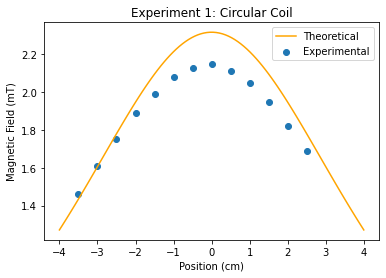

In [28]:
position = []       # m
experimental = []   # T

mu0 = 4 * np.pi * 10**-7
current = 1.001   # A
R = 0.114 / 2   # m
turns = 210
theo_x = np.linspace(-0.04, 0.04, 100)
theo_y = 1/2 * mu0 * current * (R**2)/(R**2+theo_x**2)**1.5 * turns

theo_value = lambda x: 1/2 * mu0 * current * (R**2)/(R**2+x**2)**1.5 * turns

for r in range(5, 18):
    position.append(0.01 * ws.cell(row=r, column=1).value - 0.105)
    experimental.append(ws.cell(row=r, column=2).value * 10**-3)

position = np.array(position); experimental = np.array(experimental)
plt.scatter(100*position, 1000*experimental,label="Experimental")
plt.plot(100*theo_x, 1000*theo_y, label="Theoretical", color='orange')
plt.xlabel("Position (cm)")
plt.ylabel("Magnetic Field (mT)")
plt.title("Experiment 1: Circular Coil")
plt.legend()

SSE = 0
for i in range(len(position)):
    x = position[i]
    y = experimental[i]
    SSE += (theo_value(x) - y)**2
RMS = np.sqrt(SSE / len(position))
print(f"RMSE = {RMS * 1000} mT")

## 솔레노이드
<img src="solenoid.jpg" width="400"/>

$$B =\frac{1}{2}\mu_0 ni \frac{1}{\sqrt{1+4(R/L)^2}}$$

RMSE = 0.08798625568801746 mT


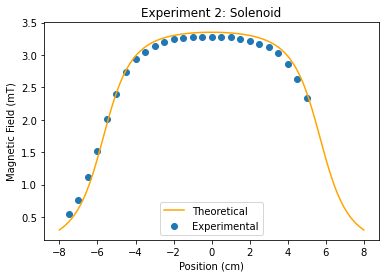

In [38]:
position = []       # m
experimental = []   # T

mu0 = 4 * np.pi * 10**-7
current = 0.501   # A
R = 0.032 / 2   # m
turns = 630
L = 11.4 / 100 # cm
n = turns / L # turns per unit length

theo_x = np.linspace(-0.08, 0.08, 200)
def theo_value_t(theta1, theta2):
    return 1/2 * mu0 * current * n * (np.cos(theta1) + np.cos(theta2))
def theo_value(x):
    theta1 = np.arctan2(R,(L/2 - x))
    theta2 = np.arctan2(R,(L/2 + x))
    return theo_value_t(theta1, theta2)
theo_y = theo_value(theo_x)
for r in range(5, 31):
    position.append(0.01 * ws.cell(row=r, column=4).value - 0.105)
    experimental.append(ws.cell(row=r, column=5).value * 10**-3)

position = np.array(position); experimental = np.array(experimental)
plt.scatter(100*position, 1000*experimental,label="Experimental")
plt.plot(100*theo_x, 1000*theo_y, label="Theoretical", color='orange')
plt.xlabel("Position (cm)")
plt.ylabel("Magnetic Field (mT)")
plt.title("Experiment 2: Solenoid")
plt.legend()

SSE = 0
for i in range(len(position)):
    x = position[i]
    y = experimental[i]
    SSE += (theo_value(x) - y)**2
RMS = np.sqrt(SSE / len(position))
print(f"RMSE = {RMS * 1000} mT")


## 헬름홀츠 코일(전류 같은 방향)
<img src="helmholtz_same_dir.jpg" width="400"/>

$$B=\frac{\mu_0Ni}{2}\left(\frac{R}{\left(R^2+\left(x+R/2\right)^2\right)^{3/2}}+\frac{R}{{\left(R^2+(x-R/2\right)^2)}^{3/2}}\right)$$

RMSE = 0.19780878603492857 mT


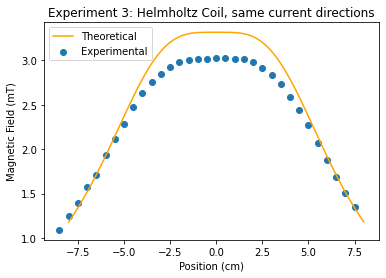

In [45]:
position = []       # m
experimental = []   # T

mu0 = 4 * np.pi * 10**-7
current = 1.001   # A
R = 0.114 / 2   # m
turns = 210
theo_x = np.linspace(-0.04, 0.04, 100)

theo_x = np.linspace(-0.08, 0.08, 200)

def theo_value(x):
    return 1/2 * mu0 * current * turns * (R**2/ (R**2 + (x+R/2)**2)**1.5 + R**2/ (R**2 + (x-R/2)**2)**1.5)
theo_y = theo_value(theo_x)

for r in range(5, 38):
    position.append(0.01 * ws.cell(row=r, column=7).value - 0.135)
    experimental.append(ws.cell(row=r, column=8).value * 10**-3)

position = np.array(position); experimental = np.array(experimental)
plt.scatter(100*position, 1000*experimental,label="Experimental")
plt.plot(100*theo_x, 1000*theo_y, label="Theoretical", color='orange')
plt.xlabel("Position (cm)")
plt.ylabel("Magnetic Field (mT)")
plt.title("Experiment 3: Helmholtz Coil, same current directions")
plt.legend()

SSE = 0
for i in range(len(position)):
    x = position[i]
    y = experimental[i]
    SSE += (theo_value(x) - y)**2
RMS = np.sqrt(SSE / len(position))
print(f"RMSE = {RMS * 1000} mT")


## 헬름홀츠 코일(전류 다른 방향)
<img src="helmholtz_oppo_dir.jpg" width="400"/>

$$B=\frac{\mu_0Ni}{2}\left(\frac{R^2}{\left(R^2+\left(x+R/2\right)^2\right)^{3/2}}-\frac{R^2}{{\left(R^2+(x-R/2\right)^2)}^{3/2}}\right)$$

RMSE = 0.09950455326989602 mT


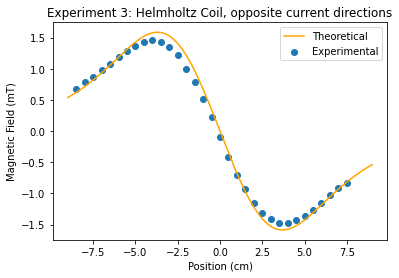

In [50]:
position = []       # m
experimental = []   # T

mu0 = 4 * np.pi * 10**-7
current = 1.00   # A
R = 0.114 / 2   # m
turns = 210

theo_x = np.linspace(-0.09, 0.09, 200)

def theo_value(x):
    return 1/2 * mu0 * current * turns * (R**2/ (R**2 + (x+R/2)**2)**1.5 - R**2/ (R**2 + (x-R/2)**2)**1.5)
theo_y = theo_value(theo_x)

for r in range(5, 38):
    position.append(0.01 * ws.cell(row=r, column=10).value - 0.135)
    experimental.append(ws.cell(row=r, column=11).value * 10**-3)

position = np.array(position); experimental = np.array(experimental)
plt.scatter(100*position, 1000*experimental,label="Experimental")
plt.plot(100*theo_x, 1000*theo_y, label="Theoretical", color='orange')
plt.xlabel("Position (cm)")
plt.ylabel("Magnetic Field (mT)")
plt.title("Experiment 3: Helmholtz Coil, opposite current directions")
plt.legend()

SSE = 0
for i in range(len(position)):
    x = position[i]
    y = experimental[i]
    SSE += (theo_value(x) - y)**2
RMS = np.sqrt(SSE / len(position))
print(f"RMSE = {RMS * 1000} mT")


## 원형 코일 오차 분석

RMSE = 0.10078662964896169 mT


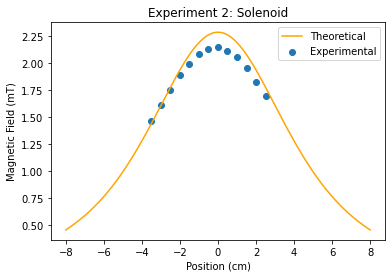

In [51]:
position = []       # m
experimental = []   # T

mu0 = 4 * np.pi * 10**-7
current = 1.001   # A
R = 0.114 / 2   # m
turns = 210
L = 0.02 # m
n = turns / L # turns per unit length

theo_x = np.linspace(-0.08, 0.08, 200)
theo_y = 1/2 * mu0 * current * (R**2)/(R**2+theo_x**2)**1.5 * turns


def theo_value_t(theta1, theta2):
    return 1/2 * mu0 * current * n * (np.cos(theta1) + np.cos(theta2))
def theo_value(x):
    theta1 = np.arctan2(R,(L/2 - x))
    theta2 = np.arctan2(R,(L/2 + x))
    return theo_value_t(theta1, theta2)
theo_y = theo_value(theo_x)
for r in range(5, 18):
    position.append(0.01 * ws.cell(row=r, column=1).value - 0.105)
    experimental.append(ws.cell(row=r, column=2).value * 10**-3)

position = np.array(position); experimental = np.array(experimental)
plt.scatter(100*position, 1000*experimental,label="Experimental")
plt.plot(100*theo_x, 1000*theo_y, label="Theoretical", color='orange')
plt.xlabel("Position (cm)")
plt.ylabel("Magnetic Field (mT)")
plt.title("Experiment 2: Solenoid")
plt.legend()

SSE = 0
for i in range(len(position)):
    x = position[i]
    y = experimental[i]
    SSE += (theo_value(x) - y)**2
RMS = np.sqrt(SSE / len(position))
print(f"RMSE = {RMS * 1000} mT")
